# Credit Risk Modeling: PD Model
*Author: Urinboev Barkamol*

# Import Libraries

In [114]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Loading the Data and Selecting the Features

## Import Data


In [15]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

## Explore Data

In [16]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [17]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


In [18]:
loan_data_inputs_train.shape

(373028, 324)

In [19]:
loan_data_targets_train.shape

(373028, 1)

In [20]:
loan_data_inputs_test.shape

(93257, 324)

In [21]:
loan_data_targets_test.shape

(93257, 1)

## 3. Selecting Features: dataframe only with dummy variables 

In [22]:
from pandas.core.dtypes.dtypes import CategoricalDtypeType
lst_cat = pd.read_csv('List of Categories.csv')
#Read the csv: list of categories
cat_lst = lst_cat.iloc[:,0].tolist()
#Convert the dataframe to a list
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , cat_lst]
#Only select columns of dummy variables



In [23]:
lst_ref = pd.read_csv('Reference Categories.csv')
ref_categories = lst_ref.iloc[:,0].tolist()

In [24]:
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1) 
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


## 4. PD Model Estimation

### 4.1 Logistic Regression


In [27]:
# Create an instance of an object from the 'LogisticRegression' class
reg = LogisticRegression()

In [26]:
#pd.options.display.max_rows  = None

In [28]:
# Estimates the coefficients of the object from the 'LogisticRegression' class
#  with inputs (independent variables) contained in the first dataframe
#  and targets (dependent variables) contained in the second dataframe.
reg.fit(inputs_train, loan_data_targets_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
# Displays the intercept contain in the estimated ("fitted") object 
#  from the 'LogisticRegression' class
reg.intercept_




array([-1.33113208])

In [30]:
# Displays the coefficients contained in the estimated ("fitted") object 
#  from the 'LogisticRegression' class
reg.coef_

array([[ 1.1601155 ,  0.90606422,  0.70887051,  0.51906472,  0.33683609,
         0.14490457,  0.09080474,  0.10678446,  0.02966994,  0.05523751,
         0.05659726,  0.05939728,  0.07496248,  0.13243528,  0.09934615,
         0.18111627,  0.22492225,  0.2203374 ,  0.25914381,  0.31661432,
         0.51751364,  0.08806445, -0.01075847,  0.30677515,  0.20251507,
         0.21414965,  0.26666463,  0.05442862,  0.07807014,  0.10017186,
         0.12529289,  0.08959096,  0.06084349,  0.12334366,  1.0750599 ,
         0.87435703,  0.77403135,  0.57294429,  0.41065068,  0.16587406,
        -0.06981963,  0.85054186,  0.53834134,  0.28958774,  0.10064463,
         0.05611025,  0.03782059,  0.07954364,  0.1195355 ,  0.12623994,
         0.07426599,  0.03129923,  0.63481783,  0.49142002,  0.28204715,
        -0.01103393, -0.10865469, -0.13433051, -0.14973426, -0.15433883,
        -0.11934175, -0.20971846,  0.12264217,  0.17844249, -0.02093614,
         0.02534552,  0.21759259,  0.0346928 ,  0.0

In [31]:
# Stores the names of the columns of a dataframe in a variable.
feature_name = inputs_train.columns.values

In [32]:
# Create a dataframe with a column titled 'Feature name' and 
#  row values contained in the 'feature_name' variable.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a new column in the dataframe, called 'Coefficients',
#  with row values the transposed coefficients 
#  from the 'LogisticRegression' object
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Increase the index of every row of the dataframe with 1.
summary_table.index = summary_table.index +1
# Assigns values of the row with index 0 of the dataframe.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Sort the dataframe by index.
summary_table = summary_table.sort_index()
summary_table


,Feature name,Coefficients
0,Intercept,-1.331132
1,grade:A,1.160116
2,grade:B,0.906064
3,grade:C,0.708871
4,grade:D,0.519065
...,...,...
100,mths_since_last_record:3-20,0.435631
101,mths_since_last_record:21-31,0.364497
102,mths_since_last_record:32-80,0.527085
103,mths_since_last_record:81-86,0.201881



## 4.2 Build Logistic Regression Model with P-values

In [33]:
# As there is no built-in method to calcualte P values for 
#  sklearn logistic regression

# Build a Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [34]:
# Replicate the codes in early section
reg = LogisticRegression_with_p_values()
reg.fit(inputs_train, loan_data_targets_train)
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table



/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature name,Coefficients
0,Intercept,-1.331132
1,grade:A,1.160116
2,grade:B,0.906064
3,grade:C,0.708871
4,grade:D,0.519065
...,...,...
100,mths_since_last_record:3-20,0.435631
101,mths_since_last_record:21-31,0.364497
102,mths_since_last_record:32-80,0.527085
103,mths_since_last_record:81-86,0.201881


In [35]:
p_values = reg.p_values

In [36]:
p_values = np.append(np.nan, np.array(p_values))

In [37]:
summary_table['p_values'] = p_values 

In [38]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.331132,NaN
1,grade:A,1.160116,1.699922e-37
2,grade:B,0.906064,1.036924e-49
3,grade:C,0.708871,6.535948e-36
4,grade:D,0.519065,4.993292e-22
...,...,...,...
100,mths_since_last_record:3-20,0.435631,6.071748e-04
101,mths_since_last_record:21-31,0.364497,1.779825e-03
102,mths_since_last_record:32-80,0.527085,5.039916e-09
103,mths_since_last_record:81-86,0.201881,5.750886e-02



## 4.3 Build Logistic Regression Models without Insignificant Variables

In [39]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

lst_cat = pd.read_csv('List of Sig Categories.csv')
#Read the csv: list of significant categories
cat_lst = lst_cat.iloc[:,0].tolist()
#Convert the dataframe to a list
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: ,cat_lst]
#Only select columns of dummy variables
inputs_train_with_ref_cat.head()
#Overwrite the dataframe with the significant categories

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
206088,0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
136020,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
412305,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
36159,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [40]:
# Remove the reference categories
lst_ref = pd.read_csv('Sig Ref Categories.csv')
ref_categories = lst_ref.iloc[:,0].tolist()
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
365838,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
131932,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
146867,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [41]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [42]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
feature_name = inputs_train.columns.values

In [44]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.373997
1,grade:A,1.123676
2,grade:B,0.878910
3,grade:C,0.684789
4,grade:D,0.496922
...,...,...
80,mths_since_last_record:3-20,0.440623
81,mths_since_last_record:21-31,0.350700
82,mths_since_last_record:32-80,0.502936
83,mths_since_last_record:81-86,0.175837


In [45]:
# Add P values
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['P Values'] = p_values
summary_table

,Feature name,Coefficients,P Values
0,Intercept,-1.373997,NaN
1,grade:A,1.123676,3.218125e-35
2,grade:B,0.878910,4.287168e-47
3,grade:C,0.684789,6.723311e-34
4,grade:D,0.496922,1.347294e-20
...,...,...,...
80,mths_since_last_record:3-20,0.440623,3.347362e-04
81,mths_since_last_record:21-31,0.350700,1.833022e-03
82,mths_since_last_record:32-80,0.502936,3.969949e-09
83,mths_since_last_record:81-86,0.175837,8.605070e-02


In [46]:
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.
pickle.dump(reg2, open('pd_model.sav', 'wb'))

# 5. PD Model Validation (Test)




## 5.1 Remove insignificant variables from test dataframe

In [47]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[:,cat_lst]
inputs_test_with_ref_cat

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
296284,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
61777,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
91763,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [48]:
# And here, in the list below, we keep the variable names for the reference categories,
# only for the variables we used in our final PD model.
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
296284,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
61777,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
91763,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [49]:
inputs_test.shape

(93257, 84)

In [50]:
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.
y_hat_test = reg2.model.predict(inputs_test)

In [51]:
# This is an array of predicted discrete classess (in this case, 0s and 1s).
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [52]:
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [53]:
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.
y_hat_test_proba

array([[0.07569451, 0.92430549],
       [0.150761  , 0.849239  ],
       [0.11465204, 0.88534796],
       ...,
       [0.02678673, 0.97321327],
       [0.04020882, 0.95979118],
       [0.04763356, 0.95236644]])

In [54]:
# Only leave the 'good' probabilities in the array
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
y_hat_test_proba

array([0.92430549, 0.849239  , 0.88534796, ..., 0.97321327, 0.95979118,
       0.95236644])

In [55]:
loan_data_targets_test_temp = loan_data_targets_test
# We reset the index of a dataframe.
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [56]:
df_actual_predicted_probs = \
pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes
df_actual_predicted_probs.columns = \
['loan_data_targets_test', 'y_hat_test_proba']
# Rename the columns
df_actual_predicted_probs.index = loan_data_targets_test.index
# Revert the index
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
0,1,0.924305
1,1,0.849239
2,1,0.885348
3,1,0.940635
4,1,0.968665


## 5.3 Confusion Matrix

In [57]:
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = \
np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1,0)
df_actual_predicted_probs

,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,1,0.924305,1
1,1,0.849239,0
2,1,0.885348,0
3,1,0.940635,1
4,1,0.968665,1
...,...,...,...
93252,1,0.880174,0
93253,1,0.966432,1
93254,0,0.973213,1
93255,1,0.959791,1


In [58]:
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.
confusion_matrix = pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
                               df_actual_predicted_probs['y_hat_test'],
                               rownames = ['Actual'], colnames = ['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,7374,2816
1,35813,47254


In [59]:
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.
confusion_matrix_per = confusion_matrix / df_actual_predicted_probs.shape[0]
confusion_matrix_per

Predicted,0,1
Actual,,
0,0.079072,0.030196
1,0.384025,0.506707


In [60]:
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.
true_neg = confusion_matrix_per.iloc[0,0]
true_pos = confusion_matrix_per.iloc[1,1]
true_rate = true_neg + true_pos
true_rate

0.5857790836076648

## 5.4 ROC Curve and AUC

In [61]:
# Returns the Receiver Operating Characteristic (ROC) Curve from 
#  a set of actual values and their predicted probabilities
# As a result, we get three arrays: the false positive rates, 
#  the true positive rates, and the thresholds
log_roc = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], 
                    df_actual_predicted_probs['y_hat_test_proba'])
log_roc

(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99262858, 0.99262858, 0.99069757, ..., 0.48790605, 0.39374252,
        0.37529155]))

In [62]:
# Store each of the three arrays in a separate variable
fpr,tpr,thresholds = log_roc

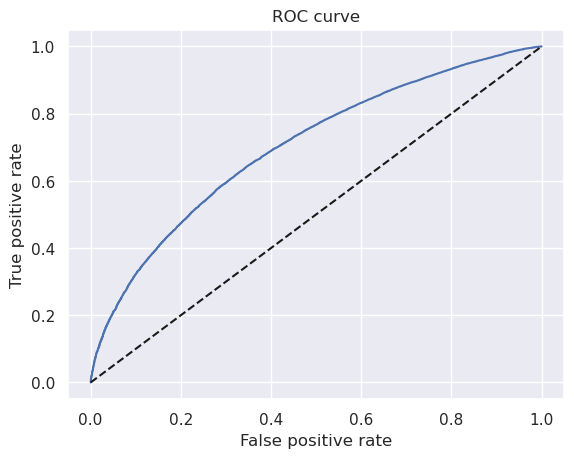

In [63]:
sns.set()
plt.plot(fpr, tpr)
plt.plot(tpr,tpr, linestyle = '--', color = 'k' )
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [64]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], 
                      df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7022081168076568

## Gini and Kolmogorov-Smirnov

In [65]:
# Sort the table by test_prob values in ascending order
df_actual_predicted_probs = \
df_actual_predicted_probs.sort_values('y_hat_test_proba')

# Reset the index from 0
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
df_actual_predicted_probs

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,14868,1,0.375292,0
1,58288,1,0.392105,0
2,48752,0,0.393743,0
3,67123,0,0.448970,0
4,85282,0,0.457736,0
...,...,...,...,...
93252,23536,1,0.991292,1
93253,27134,1,0.991304,1
93254,28298,1,0.991652,1
93255,18097,1,0.992058,1


In [66]:
df_actual_predicted_probs['Cumulative N Population'] = \
df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = \
df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = \
df_actual_predicted_probs['Cumulative N Population'] - \
df_actual_predicted_probs['Cumulative N Good']
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,14868,1,0.375292,0,1,1,0
1,58288,1,0.392105,0,2,2,0
2,48752,0,0.393743,0,3,2,1
3,67123,0,0.448970,0,4,2,2
4,85282,0,0.457736,0,5,2,3


In [67]:
df_actual_predicted_probs['Cumulative Perc Population'] = \
df_actual_predicted_probs['Cumulative N Population'] / df_actual_predicted_probs.shape[0]
df_actual_predicted_probs['Cumulative Perc Good'] = \
df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = \
df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,14868,1,0.375292,0,1,1,0,0.000011,0.000012,0.000000
1,58288,1,0.392105,0,2,2,0,0.000021,0.000024,0.000000
2,48752,0,0.393743,0,3,2,1,0.000032,0.000024,0.000098
3,67123,0,0.448970,0,4,2,2,0.000043,0.000024,0.000196
4,85282,0,0.457736,0,5,2,3,0.000054,0.000024,0.000294


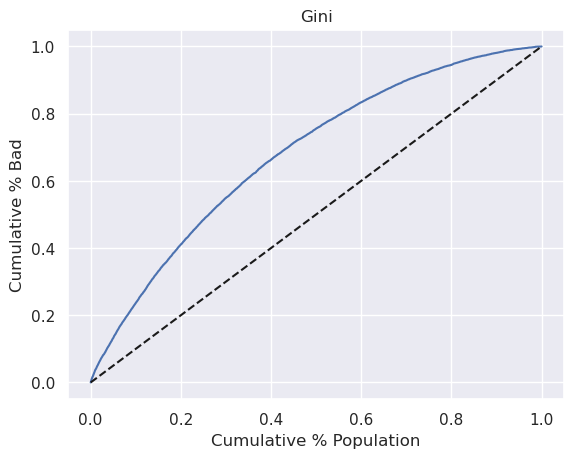

In [68]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],
         df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Bad'],
         df_actual_predicted_probs['Cumulative Perc Bad'],
        linestyle = '--', color ='k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')
plt.show()



In [69]:
Gini = AUROC * 2 - 1
Gini

0.40441623361531365

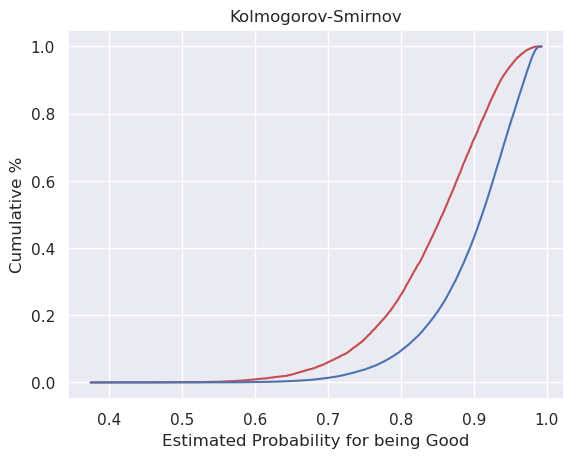

In [70]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],
         df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],
         df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')
plt.show()

In [71]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] -  df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.2966746932223847

## 6. PD Model and Scorecard

### 6.1 Join the tables and prepare the needed columns

In [72]:
summary_table

,Feature name,Coefficients,P Values
0,Intercept,-1.373997,NaN
1,grade:A,1.123676,3.218125e-35
2,grade:B,0.878910,4.287168e-47
3,grade:C,0.684789,6.723311e-34
4,grade:D,0.496922,1.347294e-20
...,...,...,...
80,mths_since_last_record:3-20,0.440623,3.347362e-04
81,mths_since_last_record:21-31,0.350700,1.833022e-03
82,mths_since_last_record:32-80,0.502936,3.969949e-09
83,mths_since_last_record:81-86,0.175837,8.605070e-02


In [73]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [74]:
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['Coefficients'] = 0
# We create a third column, called 'p_values', with contains only NaN values.
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [75]:
# Concat the ref cats with summary_table
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard.drop(['index'], axis= 1, inplace = True)
df_scorecard

,Feature name,Coefficients,P Values,p_values
0,Intercept,-1.373997,NaN,NaN
1,grade:A,1.123676,3.218125e-35,NaN
2,grade:B,0.878910,4.287168e-47,NaN
3,grade:C,0.684789,6.723311e-34,NaN
4,grade:D,0.496922,1.347294e-20,NaN
...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,NaN
98,annual_inc:<20K,0.000000,NaN,NaN
99,dti:>35,0.000000,NaN,NaN
100,mths_since_last_delinq:0-3,0.000000,NaN,NaN


In [76]:
# # We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
df_scorecard['Original feature name'] = \
df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,Feature name,Coefficients,P Values,p_values,Original feature name
0,Intercept,-1.373997,NaN,NaN,Intercept
1,grade:A,1.123676,3.218125e-35,NaN,grade
2,grade:B,0.878910,4.287168e-47,NaN,grade
3,grade:C,0.684789,6.723311e-34,NaN,grade
4,grade:D,0.496922,1.347294e-20,NaN,grade
...,...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,NaN,acc_now_delinq
98,annual_inc:<20K,0.000000,NaN,NaN,annual_inc
99,dti:>35,0.000000,NaN,NaN,dti
100,mths_since_last_delinq:0-3,0.000000,NaN,NaN,mths_since_last_delinq


## 6.2 Build grouped tables and calculate the SUM

In [77]:
# Group the coefficients by feature name
df_scorecard_group_min = \
df_scorecard.groupby('Original feature name')['Coefficients'].min()
df_scorecard_group_max = \
df_scorecard.groupby('Original feature name')['Coefficients'].max()

In [78]:
df_scorecard_group_min



Original feature name
Intercept                     -1.373997
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.081521
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.071772
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.011189
Name: Coefficients, dtype: float64

In [79]:
df_scorecard_group_max



Original feature name
Intercept                     -1.373997
acc_now_delinq                 0.180373
addr_state                     0.521968
annual_inc                     0.552381
dti                            0.384444
emp_length                     0.125856
grade                          1.123676
home_ownership                 0.106246
initial_list_status            0.053825
inq_last_6mths                 0.666241
int_rate                       0.883121
mths_since_earliest_cr_line    0.129362
mths_since_issue_d             1.084221
mths_since_last_delinq         0.183085
mths_since_last_record         0.502936
purpose                        0.301865
term                           0.078942
verification_status            0.085715
Name: Coefficients, dtype: float64

In [80]:
min_sum_coef = df_scorecard_group_min.sum()
min_sum_coef


-1.5384788353401215

In [81]:
max_sum_coef = df_scorecard_group_max.sum()
max_sum_coef


5.590255673305014

In [82]:
min_score = 300
max_score = 850


## 6.3 Calculate the scores for each variable

In [83]:
df_scorecard.head()



,Feature name,Coefficients,P Values,p_values,Original feature name
0,Intercept,-1.373997,NaN,NaN,Intercept
1,grade:A,1.123676,3.218125e-35,NaN,grade
2,grade:B,0.878910,4.287168e-47,NaN,grade
3,grade:C,0.684789,6.723311e-34,NaN,grade
4,grade:D,0.496922,1.347294e-20,NaN,grade


In [84]:
df_scorecard['Score - Calculation'] = \
df_scorecard['Coefficients']*(max_score - min_score)/(max_sum_coef - min_sum_coef)
df_scorecard.head()

,Feature name,Coefficients,P Values,p_values,Original feature name,Score - Calculation
0,Intercept,-1.373997,NaN,NaN,Intercept,-106.007386
1,grade:A,1.123676,3.218125e-35,NaN,grade,86.694448
2,grade:B,0.878910,4.287168e-47,NaN,grade,67.810114
3,grade:C,0.684789,6.723311e-34,NaN,grade,52.833202
4,grade:D,0.496922,1.347294e-20,NaN,grade,38.338772


In [85]:
#Calculate the intercept
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score.
df_scorecard['Score - Calculation'][0] = \
(max_score - min_score)/(max_sum_coef - min_sum_coef) * \
(df_scorecard['Coefficients'][0] - min_sum_coef) + min_score
df_scorecard.head()

/tmp/ipykernel_4713/3209504849.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = \


,Feature name,Coefficients,P Values,p_values,Original feature name,Score - Calculation
0,Intercept,-1.373997,NaN,NaN,Intercept,312.690169
1,grade:A,1.123676,3.218125e-35,NaN,grade,86.694448
2,grade:B,0.878910,4.287168e-47,NaN,grade,67.810114
3,grade:C,0.684789,6.723311e-34,NaN,grade,52.833202
4,grade:D,0.496922,1.347294e-20,NaN,grade,38.338772


In [86]:
# Round the scores
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard.head()

,Feature name,Coefficients,P Values,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,Intercept,-1.373997,NaN,NaN,Intercept,312.690169,313.0
1,grade:A,1.123676,3.218125e-35,NaN,grade,86.694448,87.0
2,grade:B,0.878910,4.287168e-47,NaN,grade,67.810114,68.0
3,grade:C,0.684789,6.723311e-34,NaN,grade,52.833202,53.0
4,grade:D,0.496922,1.347294e-20,NaN,grade,38.338772,38.0


In [87]:
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel = \
df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel


300.0

In [88]:
# Have to subtract the 1 extra point
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel = \
df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

851.0

In [89]:
# One has to be subtracted from the maximum score for one original variable. Which one? We'll evaluate based on differences.

In [90]:
df_scorecard['Difference'] = \
df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
pd.options.display.max_rows = 30
df_scorecard

,Feature name,Coefficients,P Values,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,Intercept,-1.373997,NaN,NaN,Intercept,312.690169,313.0,0.309831
1,grade:A,1.123676,3.218125e-35,NaN,grade,86.694448,87.0,0.305552
2,grade:B,0.878910,4.287168e-47,NaN,grade,67.810114,68.0,0.189886
3,grade:C,0.684789,6.723311e-34,NaN,grade,52.833202,53.0,0.166798
4,grade:D,0.496922,1.347294e-20,NaN,grade,38.338772,38.0,-0.338772
...,...,...,...,...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,NaN,acc_now_delinq,0.000000,0.0,0.000000
98,annual_inc:<20K,0.000000,NaN,NaN,annual_inc,0.000000,0.0,0.000000
99,dti:>35,0.000000,NaN,NaN,dti,0.000000,0.0,0.000000
100,mths_since_last_delinq:0-3,0.000000,NaN,NaN,mths_since_last_delinq,0.000000,0.0,0.000000


In [91]:
# Find the max score among each parent category

ind = list(df_scorecard.index) #Create an index list
max_difference = [] #Create an empty set to store max difference for each cat
for i in ind:
    ori_name = df_scorecard['Original feature name'][i]
    this_score = df_scorecard['Score - Preliminary'][i]
    max_score_t = df_scorecard.loc[df_scorecard['Original feature name']
                               == ori_name]['Score - Preliminary'].max()
    this_diff = df_scorecard['Difference'][i]
    
    if this_score == max_score_t:
        max_difference.append(this_diff)
    else:
        max_difference.append(0)

In [92]:
df_scorecard['Max_Difference'] = max_difference
df_scorecard['Max_Difference'][0] = 0
#pd.options.display.max_rows = 30
df_scorecard

/tmp/ipykernel_4713/1330656845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Max_Difference'][0] = 0


,Feature name,Coefficients,P Values,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Max_Difference
0,Intercept,-1.373997,NaN,NaN,Intercept,312.690169,313.0,0.309831,0.000000
1,grade:A,1.123676,3.218125e-35,NaN,grade,86.694448,87.0,0.305552,0.305552
2,grade:B,0.878910,4.287168e-47,NaN,grade,67.810114,68.0,0.189886,0.000000
3,grade:C,0.684789,6.723311e-34,NaN,grade,52.833202,53.0,0.166798,0.000000
4,grade:D,0.496922,1.347294e-20,NaN,grade,38.338772,38.0,-0.338772,0.000000
...,...,...,...,...,...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,NaN,acc_now_delinq,0.000000,0.0,0.000000,0.000000
98,annual_inc:<20K,0.000000,NaN,NaN,annual_inc,0.000000,0.0,0.000000,0.000000
99,dti:>35,0.000000,NaN,NaN,dti,0.000000,0.0,0.000000,0.000000
100,mths_since_last_delinq:0-3,0.000000,NaN,NaN,mths_since_last_delinq,0.000000,0.0,0.000000,0.000000


In [93]:
# Get the item rounded the most among high-score categories
max_diff_ind = df_scorecard['Max_Difference'].idxmax()
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][max_diff_ind] = \
df_scorecard['Score - Final'][max_diff_ind] - 1

/tmp/ipykernel_4713/1717411435.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][max_diff_ind] = \


In [94]:
max_sum_score_prel = \
df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

850.0

In [95]:
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

300.0

## 6.4 Calculating Credit Score

In [96]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [97]:
df_scorecard

,Feature name,Coefficients,P Values,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Max_Difference,Score - Final
0,Intercept,-1.373997,NaN,NaN,Intercept,312.690169,313.0,0.309831,0.000000,313.0
1,grade:A,1.123676,3.218125e-35,NaN,grade,86.694448,87.0,0.305552,0.305552,87.0
2,grade:B,0.878910,4.287168e-47,NaN,grade,67.810114,68.0,0.189886,0.000000,68.0
3,grade:C,0.684789,6.723311e-34,NaN,grade,52.833202,53.0,0.166798,0.000000,53.0
4,grade:D,0.496922,1.347294e-20,NaN,grade,38.338772,38.0,-0.338772,0.000000,38.0
...,...,...,...,...,...,...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,NaN,acc_now_delinq,0.000000,0.0,0.000000,0.000000,0.0
98,annual_inc:<20K,0.000000,NaN,NaN,annual_inc,0.000000,0.0,0.000000,0.000000,0.0
99,dti:>35,0.000000,NaN,NaN,dti,0.000000,0.0,0.000000,0.000000,0.0
100,mths_since_last_delinq:0-3,0.000000,NaN,NaN,mths_since_last_delinq,0.000000,0.0,0.000000,0.000000,0.0


In [98]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [99]:
# Make the column order match the row orde of the scorecard df
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
inputs_test_with_ref_cat_w_intercept

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
296284,1,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
61777,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
91763,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [100]:
# Make the column order match the row orde of the scorecard df
inputs_test_with_ref_cat_w_intercept = \
inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
inputs_test_with_ref_cat_w_intercept

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,...,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
296284,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
61777,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
91763,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [101]:
scorecard_scores = df_scorecard['Score - Final']
scorecard_scores.shape

(102,)

In [102]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [103]:
scorecard_scores = scorecard_scores.values.reshape(102,1)
scorecard_scores.shape

(102, 1)

In [104]:
scorecard_scores.shape

(102, 1)

In [105]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores

,0
362514,614.0
288564,553.0
213591,577.0
263083,633.0
165001,683.0
...,...
115,573.0
296284,678.0
61777,696.0
91763,664.0


## From Credit Score to PD

In [106]:
# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.
#Convert PD to sum of the coeffs
sum_coef_from_score = \
((y_scores - min_score) / (max_score - min_score)) * \
(max_sum_coef - min_sum_coef) + min_sum_coef
sum_coef_from_score



,0
362514,2.531381
288564,1.740739
213591,2.051811
263083,2.777646
165001,3.425713
...,...
115,1.999966
296284,3.360906
61777,3.594210
91763,3.179447


In [107]:
# Here we divide an exponent raised to sum of coefficients from score by
# an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
362514,0.926313
288564,0.850781
213591,0.886130
263083,0.941456
165001,0.968499


In [108]:
y_hat_test_proba

array([0.92430549, 0.849239  , 0.88534796, ..., 0.97321327, 0.95979118,
       0.95236644])

### Setting Cut-offs

In [109]:
# We need the confusion matrix again.
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = \
np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1,0)
df_actual_predicted_probs

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,14868,1,0.375292,0,1,1,0,0.000011,0.000012,0.000000
1,58288,1,0.392105,0,2,2,0,0.000021,0.000024,0.000000
2,48752,0,0.393743,0,3,2,1,0.000032,0.000024,0.000098
3,67123,0,0.448970,0,4,2,2,0.000043,0.000024,0.000196
4,85282,0,0.457736,0,5,2,3,0.000054,0.000024,0.000294
...,...,...,...,...,...,...,...,...,...,...
93252,23536,1,0.991292,1,93253,83063,10190,0.999957,0.999952,1.000000
93253,27134,1,0.991304,1,93254,83064,10190,0.999968,0.999964,1.000000
93254,28298,1,0.991652,1,93255,83065,10190,0.999979,0.999976,1.000000
93255,18097,1,0.992058,1,93256,83066,10190,0.999989,0.999988,1.000000


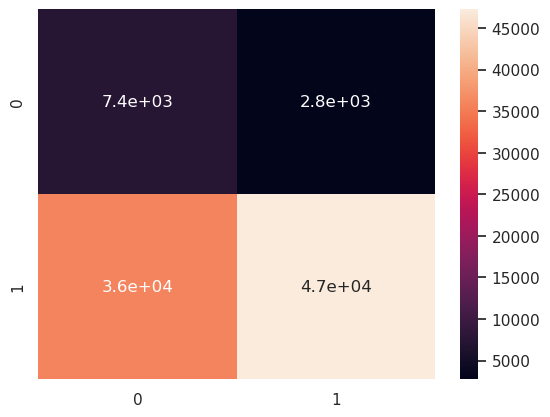

In [118]:
sns.heatmap(confusion_matrix(df_actual_predicted_probs['loan_data_targets_test'],\
                             df_actual_predicted_probs['y_hat_test']), annot=True)
plt.show()
#pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], \
#            rownames = ['Actual'], colnames = ['Predicted'])

In [124]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], \
            rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079072,0.030196
1,0.384025,0.506707


In [119]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], \
             rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + \
             (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], \
              rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5857790836076648

In [120]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99262858, 0.99262858, 0.99069757, ..., 0.48790605, 0.39374252,
        0.37529155]))

In [121]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

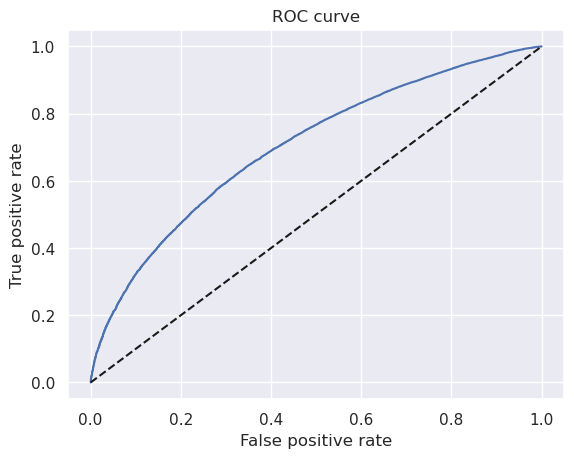

In [123]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


In [125]:
# We concatenate 3 dataframes along the columns.thresholds.shape
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

In [126]:
# We name the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [127]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.992629,0.000000,0.000000
1,0.992629,0.000000,0.000012
2,0.990698,0.000000,0.000120
3,0.990653,0.000098,0.000120
4,0.989823,0.000098,0.000421


In [128]:
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

In [133]:
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.
df_cutoffs['Score'] = \
((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) \
  - min_sum_coef) * ((max_score - min_score) \
                     / (max_sum_coef - min_sum_coef)) + min_score).round()
df_cutoffs['Score'][0] = max_score
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992629,0.000000,0.000012,797.0
2,0.990698,0.000000,0.000120,779.0
3,0.990653,0.000098,0.000120,778.0
4,0.989823,0.000098,0.000421,772.0


In [131]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17293,0.493416,0.999411,0.999964,417.0
17294,0.488603,0.999607,0.999964,415.0
17295,0.487906,0.999607,0.999976,415.0
17296,0.393743,1.000000,0.999976,385.0
17297,0.375292,1.000000,1.000000,379.0


In [134]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [135]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [136]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992629,0.000000,0.000012,797.0,1,93256,0.000011,0.999989
2,0.990698,0.000000,0.000120,779.0,10,93247,0.000107,0.999893
3,0.990653,0.000098,0.000120,778.0,11,93246,0.000118,0.999882
4,0.989823,0.000098,0.000421,772.0,36,93221,0.000386,0.999614


In [137]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17293,0.493416,0.999411,0.999964,417.0,93248,9,0.999903,0.000097
17294,0.488603,0.999607,0.999964,415.0,93250,7,0.999925,0.000075
17295,0.487906,0.999607,0.999976,415.0,93251,6,0.999936,0.000064
17296,0.393743,1.000000,0.999976,385.0,93255,2,0.999979,0.000021
17297,0.375292,1.000000,1.000000,379.0,93257,0,1.000000,0.000000


In [138]:
df_cutoffs.iloc[5000: 6200, ]
# Here we display the dataframe with cutoffs form line with index 5000 to line with index 6200.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.903596,0.259274,0.547618,591.0,48131,45126,0.516111,0.483889
5001,0.903590,0.259274,0.547678,591.0,48136,45121,0.516165,0.483835
5002,0.903583,0.259470,0.547678,591.0,48138,45119,0.516186,0.483814
5003,0.903546,0.259470,0.547919,591.0,48158,45099,0.516401,0.483599
5004,0.903546,0.259568,0.547919,591.0,48159,45098,0.516412,0.483588
...,...,...,...,...,...,...,...,...
6195,0.890385,0.325221,0.621005,580.0,54899,38358,0.588685,0.411315
6196,0.890376,0.325221,0.621065,580.0,54904,38353,0.588739,0.411261
6197,0.890370,0.325319,0.621065,580.0,54905,38352,0.588749,0.411251
6198,0.890343,0.325319,0.621209,580.0,54917,38340,0.588878,0.411122


In [139]:
df_cutoffs.iloc[1000: 2000, ]
# Here we display the dataframe with cutoffs form line with index 1000 to line with index 2000.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.953241,0.049166,0.206592,651.0,17662,75595,0.189391,0.810609
1001,0.953230,0.049166,0.206737,651.0,17674,75583,0.189519,0.810481
1002,0.953226,0.049264,0.206737,651.0,17675,75582,0.189530,0.810470
1003,0.953220,0.049264,0.206785,651.0,17679,75578,0.189573,0.810427
1004,0.953219,0.049362,0.206785,651.0,17680,75577,0.189584,0.810416
...,...,...,...,...,...,...,...,...
1995,0.936788,0.100393,0.322872,627.0,27843,65414,0.298562,0.701438
1996,0.936754,0.100393,0.323077,627.0,27860,65397,0.298744,0.701256
1997,0.936754,0.100491,0.323077,627.0,27861,65396,0.298755,0.701245
1998,0.936706,0.100491,0.323462,627.0,27893,65364,0.299098,0.700902


In [140]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [141]:
df_scorecard.to_csv('df_scorecard.csv')